In [1]:
# Run if working locally
%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sqlite3
from sqlite3 import Error
import pickle
import os, sys
import config

config.root_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, config.root_path)

from src.dataset.dataset import RawData
from src.dataset.wikisection_preprocessing import (
    tokenize,
    clean_sentence,
    preprocess_text_segmentation,
    format_data_for_db_insertion,
)
from src.dataset.utils import truncate_by_token
from db.dbv2 import Table, AugmentedTable, TrainTestTable
import pprint


from utils.metrics import windowdiff, pk

from src.bertkeywords.src.similarities import Embedding, Similarities
from src.bertkeywords.src.keywords import Keywords
from src.encoders.coherence_v2 import Coherence
from src.dataset.utils import flatten, dedupe_list, truncate_string
from src.experimentation.coherence_v2 import SimpleExperiment, CoherenceExperiment

<IPython.core.display.Javascript object>

In [7]:
experimentation = SimpleExperiment()

# constants
NUM_SAMPLES = 5000
#         MODEL_STRING="bert-base-uncased",
#         MODEL_STRING="sentence-transformers/LaBSE",
MODEL_STRING = "roberta-base"
# MODEL_STRING = "sentence-transformers/all-MiniLM-L6-v2"
GRAPHS = True
METRICS_SUMMARY = False
PREDICTIONS_SUMMARY = True
BATCH_SIZE = 2

# ----------------------------------------------------

# city experiments
# w/o keywords (i.e., ablation true)
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=4,
        start=10000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
        ablation=True,
    )
)
# w/ keywords w/o sentence collation
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="city",
        model_string=MODEL_STRING,
        max_words_per_step=4,
        start=10000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
        ablation=False,
    )
)
# # w/ everything
# experimentation.queue_experiment(
#     CoherenceExperiment(
#         dataset_type="city",
#         model_string=MODEL_STRING,
#         max_words_per_step=8,
#         start=10000,
#         num_samples=NUM_SAMPLES,
#         same_word_multiplier=2,
#         no_same_word_penalty=2,
#         kb_embeddings=True,
#         coherence_dump_on_prediction=False,
#         coherence_threshold=0.3,
#         prediction_threshold=0.47,
#         pruning=1,
#         pruning_min=7,
#         batch_size=BATCH_SIZE,
#         print_metrics_summary=METRICS_SUMMARY,
#         print_predictions_summary=PREDICTIONS_SUMMARY,
#         show_graphs=GRAPHS,
#         keyword_diversity=0.3,
#         diverse_keywords=True,
#         similar_keywords=True,
#         ablation=False,
#     )
# )

# disease experiments
# w/o keywords (i.e., ablation true)
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string=MODEL_STRING,
        max_words_per_step=4,
        start=15000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
        ablation=True,
    )
)
# w/ keywords w/o sentence collation
experimentation.queue_experiment(
    CoherenceExperiment(
        dataset_type="disease",
        model_string=MODEL_STRING,
        max_words_per_step=4,
        start=15000,
        num_samples=NUM_SAMPLES,
        same_word_multiplier=2,
        no_same_word_penalty=2,
        kb_embeddings=True,
        coherence_dump_on_prediction=False,
        coherence_threshold=0.3,
        prediction_threshold=0.47,
        pruning=1,
        pruning_min=7,
        batch_size=BATCH_SIZE,
        print_metrics_summary=METRICS_SUMMARY,
        print_predictions_summary=PREDICTIONS_SUMMARY,
        show_graphs=GRAPHS,
        keyword_diversity=0.3,
        diverse_keywords=False,
        similar_keywords=True,
        ablation=False,
    )
)
# # w/ everything
# experimentation.queue_experiment(
#     CoherenceExperiment(
#         dataset_type="disease",
#         model_string=MODEL_STRING,
#         max_words_per_step=8,
#         start=10000,
#         num_samples=NUM_SAMPLES,
#         same_word_multiplier=2,
#         no_same_word_penalty=2,
#         kb_embeddings=True,
#         coherence_dump_on_prediction=False,
#         coherence_threshold=0.3,
#         prediction_threshold=0.47,
#         pruning=1,
#         pruning_min=7,
#         batch_size=BATCH_SIZE,
#         print_metrics_summary=METRICS_SUMMARY,
#         print_predictions_summary=PREDICTIONS_SUMMARY,
#         show_graphs=GRAPHS,
#         keyword_diversity=0.3,
#         diverse_keywords=True,
#         similar_keywords=True,
#         ablation=False,
#     )
# )

<IPython.core.display.Javascript object>

Running experiment set: UcwW3
Running experiment: CoherenceExperiment(num_samples=5000, start=10000, dataset_type='city', model_string='roberta-base', max_words_per_step=4, same_word_multiplier=2, no_same_word_penalty=2, prediction_threshold=0.47, coherence_threshold=0.3, coherence_dump_on_prediction=False, pruning=1, pruning_min=7, dynamic_threshold=False, threshold_warmup=10, last_n_threshold=5, kb_embeddings=True, experiment_hash='c7NLK', batch_size=2, keyword_diversity=0.3, diverse_keywords=False, similar_keywords=True, ablation=True, print_metrics_summary=False, print_predictions_summary=True, show_graphs=True)
Using dataset: wikisection_city


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing

TOTAL BATCHES: 2500



. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 85 .. 86 .. 87 .. 88 .. 89 .. 90 .. 91 .. 92 .. 93 .. 94 .. 95 .. 96 .. 97 .. 98 .. 99 .. 100 .. 101 .. 102 .. 103 .. 104 .. 105 .. 106 .. 107 .. 108 .. 109 .. 110 .. 111 .. 112 .. 113 .. 114 .. 115 .. 116 .. 117 .. 118 .. 119 .. 120 .. 121 .. 122 .. 123 .. 124 .. 125 .. 126 .. 127 .. 128 .. 129 .. 130 .. 131 .. 132 .. 133 .. 134 .. 135 .. 136 .. 137 .. 138 .. 139 .. 140 .. 141 .. 142 .. 143 .. 144 .. 145 .. 146 .. 147 .. 148 .. 149 .. 150 .. 151 .. 152 .. 153 .. 154 .. 155 .. 156 .. 157 .. 158 .. 

.. 1164 .. 1165 .. 1166 .. 1167 .. 1168 .. 1169 .. 1170 .. 1171 .. 1172 .. 1173 .. 1174 .. 1175 .. 1176 .. 1177 .. 1178 .. 1179 .. 1180 .. 1181 .. 1182 .. 1183 .. 1184 .. 1185 .. 1186 .. 1187 .. 1188 .. 1189 .. 1190 .. 1191 .. 1192 .. 1193 .. 1194 .. 1195 .. 1196 .. 1197 .. 1198 .. 1199 .. 1200 .. 1201 .. 1202 .. 1203 .. 1204 .. 1205 .. 1206 .. 1207 .. 1208 .. 1209 .. 1210 .. 1211 .. 1212 .. 1213 .. 1214 .. 1215 .. 1216 .. 1217 .. 1218 .. 1219 .. 1220 .. 1221 .. 1222 .. 1223 .. 1224 .. 1225 .. 1226 .. 1227 .. 1228 .. 1229 .. 1230 .. 1231 .. 1232 .. 1233 .. 1234 .. 1235 .. 1236 .. 1237 .. 1238 .. 1239 .. 1240 .. 1241 .. 1242 .. 1243 .. 1244 .. 1245 .. 1246 .. 1247 .. 1248 .. 1249 .. 1250 .. 1251 .. 1252 .. 1253 .. 1254 .. 1255 .. 1256 .. 1257 .. 1258 .. 1259 .. 1260 .. 1261 .. 1262 .. 1263 .. 1264 .. 1265 .. 1266 .. 1267 .. 1268 .. 1269 .. 1270 .. 1271 .. 1272 .. 1273 .. 1274 .. 1275 .. 1276 .. 1277 .. 1278 .. 1279 .. 1280 .. 1281 .. 1282 .. 1283 .. 1284 .. 1285 .. 1286 .. 1287 .. 1288 

.. 2189 .. 2190 .. 2191 .. 2192 .. 2193 .. 2194 .. 2195 .. 2196 .. 2197 .. 2198 .. 2199 .. 2200 .. 2201 .. 2202 .. 2203 .. 2204 .. 2205 .. 2206 .. 2207 .. 2208 .. 2209 .. 2210 .. 2211 .. 2212 .. 2213 .. 2214 .. 2215 .. 2216 .. 2217 .. 2218 .. 2219 .. 2220 .. 2221 .. 2222 .. 2223 .. 2224 .. 2225 .. 2226 .. 2227 .. 2228 .. 2229 .. 2230 .. 2231 .. 2232 .. 2233 .. 2234 .. 2235 .. 2236 .. 2237 .. 2238 .. 2239 .. 2240 .. 2241 .. 2242 .. 2243 .. 2244 .. 2245 .. 2246 .. 2247 .. 2248 .. 2249 .. 2250 .. 2251 .. 2252 .. 2253 .. 2254 .. 2255 .. 2256 .. 2257 .. 2258 .. 2259 .. 2260 .. 2261 .. 2262 .. 2263 .. 2264 .. 2265 .. 2266 .. 2267 .. 2268 .. 2269 .. 2270 .. 2271 .. 2272 .. 2273 .. 2274 .. 2275 .. 2276 .. 2277 .. 2278 .. 2279 .. 2280 .. 2281 .. 2282 .. 2283 .. 2284 .. 2285 .. 2286 .. 2287 .. 2288 .. 2289 .. 2290 .. 2291 .. 2292 .. 2293 .. 2294 .. 2295 .. 2296 .. 2297 .. 2298 .. 2299 .. 2300 .. 2301 .. 2302 .. 2303 .. 2304 .. 2305 .. 2306 .. 2307 .. 2308 .. 2309 .. 2310 .. 2311 .. 2312 .. 2313 

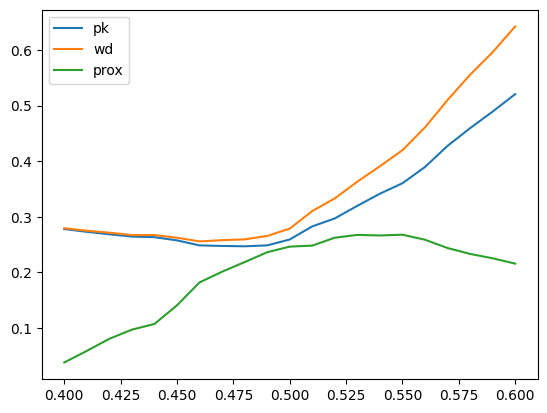

============= Predictions Summary =============
best pk: 0.24848282760920307, best prediction threshold: 0.49, proximity: 0.2361422596467826
P:[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing

TOTAL BATCHES: 2500



. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 85 .. 86 .. 87 .. 88 .. 89 .. 90 .. 91 .. 92 .. 93 .. 94 .. 95 .. 96 .. 97 .. 98 .. 99 .. 100 .. 101 .. 102 .. 103 .. 104 .. 105 .. 106 .. 107 .. 108 .. 109 .. 110 .. 111 .. 112 .. 113 .. 114 .. 115 .. 116 .. 117 .. 118 .. 119 .. 120 .. 121 .. 122 .. 123 .. 124 .. 125 .. 126 .. 127 .. 128 .. 129 .. 130 .. 131 .. 132 .. 133 .. 134 .. 135 .. 136 .. 137 .. 138 .. 139 .. 140 .. 141 .. 142 .. 143 .. 144 .. 145 .. 146 .. 147 .. 148 .. 149 .. 150 .. 151 .. 152 .. 153 .. 154 .. 155 .. 156 .. 157 .. 158 .. 

.. 1164 .. 1165 .. 1166 .. 1167 .. 1168 .. 1169 .. 1170 .. 1171 .. 1172 .. 1173 .. 1174 .. 1175 .. 1176 .. 1177 .. 1178 .. 1179 .. 1180 .. 1181 .. 1182 .. 1183 .. 1184 .. 1185 .. 1186 .. 1187 .. 1188 .. 1189 .. 1190 .. 1191 .. 1192 .. 1193 .. 1194 .. 1195 .. 1196 .. 1197 .. 1198 .. 1199 .. 1200 .. 1201 .. 1202 .. 1203 .. 1204 .. 1205 .. 1206 .. 1207 .. 1208 .. 1209 .. 1210 .. 1211 .. 1212 .. 1213 .. 1214 .. 1215 .. 1216 .. 1217 .. 1218 .. 1219 .. 1220 .. 1221 .. 1222 .. 1223 .. 1224 .. 1225 .. 1226 .. 1227 .. 1228 .. 1229 .. 1230 .. 1231 .. 1232 .. 1233 .. 1234 .. 1235 .. 1236 .. 1237 .. 1238 .. 1239 .. 1240 .. 1241 .. 1242 .. 1243 .. 1244 .. 1245 .. 1246 .. 1247 .. 1248 .. 1249 .. 1250 .. 1251 .. 1252 .. 1253 .. 1254 .. 1255 .. 1256 .. 1257 .. 1258 .. 1259 .. 1260 .. 1261 .. 1262 .. 1263 .. 1264 .. 1265 .. 1266 .. 1267 .. 1268 .. 1269 .. 1270 .. 1271 .. 1272 .. 1273 .. 1274 .. 1275 .. 1276 .. 1277 .. 1278 .. 1279 .. 1280 .. 1281 .. 1282 .. 1283 .. 1284 .. 1285 .. 1286 .. 1287 .. 1288 

.. 2189 .. 2190 .. 2191 .. 2192 .. 2193 .. 2194 .. 2195 .. 2196 .. 2197 .. 2198 .. 2199 .. 2200 .. 2201 .. 2202 .. 2203 .. 2204 .. 2205 .. 2206 .. 2207 .. 2208 .. 2209 .. 2210 .. 2211 .. 2212 .. 2213 .. 2214 .. 2215 .. 2216 .. 2217 .. 2218 .. 2219 .. 2220 .. 2221 .. 2222 .. 2223 .. 2224 .. 2225 .. 2226 .. 2227 .. 2228 .. 2229 .. 2230 .. 2231 .. 2232 .. 2233 .. 2234 .. 2235 .. 2236 .. 2237 .. 2238 .. 2239 .. 2240 .. 2241 .. 2242 .. 2243 .. 2244 .. 2245 .. 2246 .. 2247 .. 2248 .. 2249 .. 2250 .. 2251 .. 2252 .. 2253 .. 2254 .. 2255 .. 2256 .. 2257 .. 2258 .. 2259 .. 2260 .. 2261 .. 2262 .. 2263 .. 2264 .. 2265 .. 2266 .. 2267 .. 2268 .. 2269 .. 2270 .. 2271 .. 2272 .. 2273 .. 2274 .. 2275 .. 2276 .. 2277 .. 2278 .. 2279 .. 2280 .. 2281 .. 2282 .. 2283 .. 2284 .. 2285 .. 2286 .. 2287 .. 2288 .. 2289 .. 2290 .. 2291 .. 2292 .. 2293 .. 2294 .. 2295 .. 2296 .. 2297 .. 2298 .. 2299 .. 2300 .. 2301 .. 2302 .. 2303 .. 2304 .. 2305 .. 2306 .. 2307 .. 2308 .. 2309 .. 2310 .. 2311 .. 2312 .. 2313 

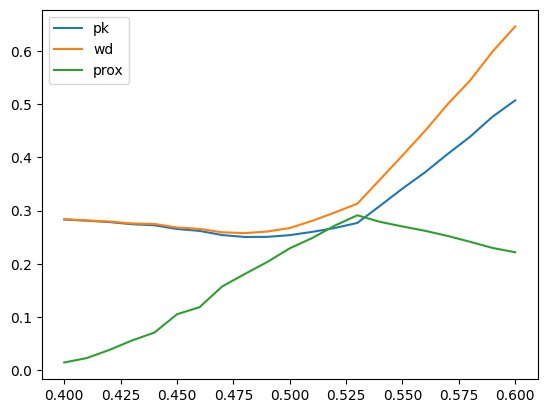

============= Predictions Summary =============
best pk: 0.2766922307435812, best prediction threshold: 0.53, proximity: 0.29106771066368387
P:[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing

TOTAL BATCHES: 2263



. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 85 .. 86 .. 87 .. 88 .. 89 .. 90 .. 91 .. 92 .. 93 .. 94 .. 95 .. 96 .. 97 .. 98 .. 99 .. 100 .. 101 .. 102 .. 103 .. 104 .. 105 .. 106 .. 107 .. 108 .. 109 .. 110 .. 111 .. 112 .. 113 .. 114 .. 115 .. 116 .. 117 .. 118 .. 119 .. 120 .. 121 .. 122 .. 123 .. 124 .. 125 .. 126 .. 127 .. 128 .. 129 .. 130 .. 131 .. 132 .. 133 .. 134 .. 135 .. 136 .. 137 .. 138 .. 139 .. 140 .. 141 .. 142 .. 143 .. 144 .. 145 .. 146 .. 147 .. 148 .. 149 .. 150 .. 151 .. 152 .. 153 .. 154 .. 155 .. 156 .. 157 .. 158 .. 

.. 1164 .. 1165 .. 1166 .. 1167 .. 1168 .. 1169 .. 1170 .. 1171 .. 1172 .. 1173 .. 1174 .. 1175 .. 1176 .. 1177 .. 1178 .. 1179 .. 1180 .. 1181 .. 1182 .. 1183 .. 1184 .. 1185 .. 1186 .. 1187 .. 1188 .. 1189 .. 1190 .. 1191 .. 1192 .. 1193 .. 1194 .. 1195 .. 1196 .. 1197 .. 1198 .. 1199 .. 1200 .. 1201 .. 1202 .. 1203 .. 1204 .. 1205 .. 1206 .. 1207 .. 1208 .. 1209 .. 1210 .. 1211 .. 1212 .. 1213 .. 1214 .. 1215 .. 1216 .. 1217 .. 1218 .. 1219 .. 1220 .. 1221 .. 1222 .. 1223 .. 1224 .. 1225 .. 1226 .. 1227 .. 1228 .. 1229 .. 1230 .. 1231 .. 1232 .. 1233 .. 1234 .. 1235 .. 1236 .. 1237 .. 1238 .. 1239 .. 1240 .. 1241 .. 1242 .. 1243 .. 1244 .. 1245 .. 1246 .. 1247 .. 1248 .. 1249 .. 1250 .. 1251 .. 1252 .. 1253 .. 1254 .. 1255 .. 1256 .. 1257 .. 1258 .. 1259 .. 1260 .. 1261 .. 1262 .. 1263 .. 1264 .. 1265 .. 1266 .. 1267 .. 1268 .. 1269 .. 1270 .. 1271 .. 1272 .. 1273 .. 1274 .. 1275 .. 1276 .. 1277 .. 1278 .. 1279 .. 1280 .. 1281 .. 1282 .. 1283 .. 1284 .. 1285 .. 1286 .. 1287 .. 1288 

.. 2189 .. 2190 .. 2191 .. 2192 .. 2193 .. 2194 .. 2195 .. 2196 .. 2197 .. 2198 .. 2199 .. 2200 .. 2201 .. 2202 .. 2203 .. 2204 .. 2205 .. 2206 .. 2207 .. 2208 .. 2209 .. 2210 .. 2211 .. 2212 .. 2213 .. 2214 .. 2215 .. 2216 .. 2217 .. 2218 .. 2219 .. 2220 .. 2221 .. 2222 .. 2223 .. 2224 .. 2225 .. 2226 .. 2227 .. 2228 .. 2229 .. 2230 .. 2231 .. 2232 .. 2233 .. 2234 .. 2235 .. 2236 .. 2237 .. 2238 .. 2239 .. 2240 .. 2241 .. 2242 .. 2243 .. 2244 .. 2245 .. 2246 .. 2247 .. 2248 .. 2249 .. 2250 .. 2251 .. 2252 .. 2253 .. 2254 .. 2255 .. 2256 .. 2257 .. 2258 .. 2259 .. 2260 .. 2261 .. 2262 .. 2263 

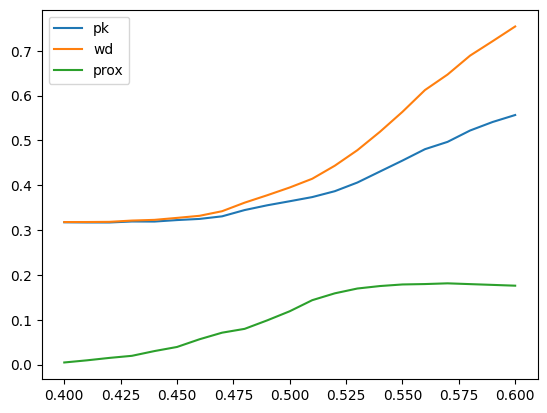

============= Predictions Summary =============
best pk: 0.38678063517795297, best prediction threshold: 0.52, proximity: 0.15898446391987253
P:[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No sentence-transformers model found with name /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/amitmaraj/.cache/torch/sentence_transformers/bert-base-uncased were not used when initializing

TOTAL BATCHES: 2263



. 1 .. 2 .. 3 .. 4 .. 5 .. 6 .. 7 .. 8 .. 9 .. 10 .. 11 .. 12 .. 13 .. 14 .. 15 .. 16 .. 17 .. 18 .. 19 .. 20 .. 21 .. 22 .. 23 .. 24 .. 25 .. 26 .. 27 .. 28 .. 29 .. 30 .. 31 .. 32 .. 33 .. 34 .. 35 .. 36 .. 37 .. 38 .. 39 .. 40 .. 41 .. 42 .. 43 .. 44 .. 45 .. 46 .. 47 .. 48 .. 49 .. 50 .. 51 .. 52 .. 53 .. 54 .. 55 .. 56 .. 57 .. 58 .. 59 .. 60 .. 61 .. 62 .. 63 .. 64 .. 65 .. 66 .. 67 .. 68 .. 69 .. 70 .. 71 .. 72 .. 73 .. 74 .. 75 .. 76 .. 77 .. 78 .. 79 .. 80 .. 81 .. 82 .. 83 .. 84 .. 85 .. 86 .. 87 .. 88 .. 89 .. 90 .. 91 .. 92 .. 93 .. 94 .. 95 .. 96 .. 97 .. 98 .. 99 .. 100 .. 101 .. 102 .. 103 .. 104 .. 105 .. 106 .. 107 .. 108 .. 109 .. 110 .. 111 .. 112 .. 113 .. 114 .. 115 .. 116 .. 117 .. 118 .. 119 .. 120 .. 121 .. 122 .. 123 .. 124 .. 125 .. 126 .. 127 .. 128 .. 129 .. 130 .. 131 .. 132 .. 133 .. 134 .. 135 .. 136 .. 137 .. 138 .. 139 .. 140 .. 141 .. 142 .. 143 .. 144 .. 145 .. 146 .. 147 .. 148 .. 149 .. 150 .. 151 .. 152 .. 153 .. 154 .. 155 .. 156 .. 157 .. 158 .. 

.. 1164 .. 1165 .. 1166 .. 1167 .. 1168 .. 1169 .. 1170 .. 1171 .. 1172 .. 1173 .. 1174 .. 1175 .. 1176 .. 1177 .. 1178 .. 1179 .. 1180 .. 1181 .. 1182 .. 1183 .. 1184 .. 1185 .. 1186 .. 1187 .. 1188 .. 1189 .. 1190 .. 1191 .. 1192 .. 1193 .. 1194 .. 1195 .. 1196 .. 1197 .. 1198 .. 1199 .. 1200 .. 1201 .. 1202 .. 1203 .. 1204 .. 1205 .. 1206 .. 1207 .. 1208 .. 1209 .. 1210 .. 1211 .. 1212 .. 1213 .. 1214 .. 1215 .. 1216 .. 1217 .. 1218 .. 1219 .. 1220 .. 1221 .. 1222 .. 1223 .. 1224 .. 1225 .. 1226 .. 1227 .. 1228 .. 1229 .. 1230 .. 1231 .. 1232 .. 1233 .. 1234 .. 1235 .. 1236 .. 1237 .. 1238 .. 1239 .. 1240 .. 1241 .. 1242 .. 1243 .. 1244 .. 1245 .. 1246 .. 1247 .. 1248 .. 1249 .. 1250 .. 1251 .. 1252 .. 1253 .. 1254 .. 1255 .. 1256 .. 1257 .. 1258 .. 1259 .. 1260 .. 1261 .. 1262 .. 1263 .. 1264 .. 1265 .. 1266 .. 1267 .. 1268 .. 1269 .. 1270 .. 1271 .. 1272 .. 1273 .. 1274 .. 1275 .. 1276 .. 1277 .. 1278 .. 1279 .. 1280 .. 1281 .. 1282 .. 1283 .. 1284 .. 1285 .. 1286 .. 1287 .. 1288 

.. 2189 .. 2190 .. 2191 .. 2192 .. 2193 .. 2194 .. 2195 .. 2196 .. 2197 .. 2198 .. 2199 .. 2200 .. 2201 .. 2202 .. 2203 .. 2204 .. 2205 .. 2206 .. 2207 .. 2208 .. 2209 .. 2210 .. 2211 .. 2212 .. 2213 .. 2214 .. 2215 .. 2216 .. 2217 .. 2218 .. 2219 .. 2220 .. 2221 .. 2222 .. 2223 .. 2224 .. 2225 .. 2226 .. 2227 .. 2228 .. 2229 .. 2230 .. 2231 .. 2232 .. 2233 .. 2234 .. 2235 .. 2236 .. 2237 .. 2238 .. 2239 .. 2240 .. 2241 .. 2242 .. 2243 .. 2244 .. 2245 .. 2246 .. 2247 .. 2248 .. 2249 .. 2250 .. 2251 .. 2252 .. 2253 .. 2254 .. 2255 .. 2256 .. 2257 .. 2258 .. 2259 .. 2260 .. 2261 .. 2262 .. 2263 

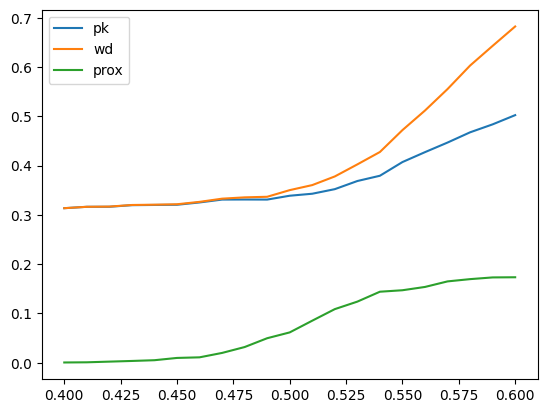

============= Predictions Summary =============
best pk: 0.37933829489352294, best prediction threshold: 0.54, proximity: 0.1440704378993299
P:[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0

<IPython.core.display.Javascript object>

In [8]:
experimentation.run()

### =========================================================

### Testing proximity metrics

In [71]:
# fmt: off
predictions=[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
real=[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
# fmt: on

<IPython.core.display.Javascript object>

In [72]:
def check_proximity(predictions, real, proximity=2):
    exact_matches = 0
    very_close_matches = 0  # within 1 step
    close_matches = 0  # within 2 steps

    for i, (p, r) in enumerate(zip(predictions, real)):
        # take care of all the cases where we're at the
        # beginning of the arrays
        prev_idx = i - 1
        prev_prev_idx = i - 2
        if i == 0 or i == 1:
            prev_idx = 0
            prev_prev_idx = 0

        prev_prediction = predictions[prev_idx]
        prev_prev_prediction = predictions[prev_prev_idx]

        # take care of all the cases where we're at the
        # end of the arrays
        next_idx = i + 1
        next_next_idx = i + 2
        if i == (len(predictions) - 1):
            next_idx = i
            next_next_idx = i
        if i == (len(predictions) - 2):
            next_idx = i + 1
            next_next_idx = i + 1

        next_prediction = predictions[next_idx]
        next_next_prediction = predictions[next_next_idx]

        if r == 1 and p == 1:
            exact_matches += 1
            continue
        if r == 1:
            if prev_prediction == 1 or next_prediction == 1:
                very_close_matches += 1
                continue
            if prev_prev_prediction == 1 or next_next_prediction == 1:
                close_matches += 1
                continue
            continue

    return exact_matches, very_close_matches, close_matches

<IPython.core.display.Javascript object>

In [73]:
exact_matches, close_matches, very_close_matches = check_proximity(predictions, real)

<IPython.core.display.Javascript object>

In [74]:
exact_matches, close_matches, very_close_matches, predictions.count(1), real.count(1)

(11, 0, 1, 15, 39)

<IPython.core.display.Javascript object>

In [75]:
num_positive_predictions = predictions.count(1)
num_real_positives = real.count(1)

<IPython.core.display.Javascript object>

In [76]:
print("Predictions ----->")
print(
    f"Percentage of positive predictions made that are within proximity of 2: {100*close_matches/num_positive_predictions}"
)
print(
    f"Percentage of positive predictions made that are within proximity of 1: {100*very_close_matches/num_positive_predictions}"
)
print(
    f"Percentage of positive predictions made that are exact matches: {100*exact_matches/num_positive_predictions}"
)
print("Real ----->")
print(
    f"Percentage of real predictions made that are within proximity of 2: {100*close_matches/num_real_positives}"
)
print(
    f"Percentage of real predictions made that are within proximity of 1: {100*very_close_matches/num_real_positives}"
)
print(
    f"Percentage of real predictions made that are exact matches: {100*exact_matches/num_real_positives}"
)

Predictions ----->
Percentage of positive predictions made that are within proximity of 2: 0.0
Percentage of positive predictions made that are within proximity of 1: 6.666666666666667
Percentage of positive predictions made that are exact matches: 73.33333333333333
Real ----->
Percentage of positive predictions made that are within proximity of 2: 0.0
Percentage of positive predictions made that are within proximity of 1: 2.5641025641025643
Percentage of positive predictions made that are exact matches: 28.205128205128204


<IPython.core.display.Javascript object>

In [82]:
proximity = (
    (1 / 3 * (close_matches / num_real_positives))
    + (1 / 2 * (very_close_matches / num_real_positives))
    + (exact_matches / num_real_positives)
) / (
    (1 / 3 * (close_matches / num_positive_predictions))
    + (1 / 2 * (very_close_matches / num_positive_predictions))
    + (exact_matches / num_positive_predictions)
)

<IPython.core.display.Javascript object>

In [84]:
proximity

0.38461538461538464

<IPython.core.display.Javascript object>

In [90]:
numerator = (
    (1 / 3 * (close_matches / num_real_positives))
    + (1 / 2 * (very_close_matches / num_real_positives))
    + (exact_matches / num_real_positives)
)

denominator = (
    (1 / 3 * (close_matches / num_positive_predictions))
    + (1 / 2 * (very_close_matches / num_positive_predictions))
    + (exact_matches / num_positive_predictions)
)

num_real_positives, num_positive_predictions, numerator, denominator

(39, 15, 0.2948717948717949, 0.7666666666666666)

<IPython.core.display.Javascript object>

In [92]:
numerator * denominator, denominator / numerator

(0.22606837606837607, 2.5999999999999996)

<IPython.core.display.Javascript object>